# **Analyzing Geospatial Data using different NLP Techniques (Movie Scripts Dataset - Countries)**

### Import Libraries
### The listed libraries and modules are essential tools for data analysis, visualization, natural language processing, and machine learning, enabling efficient handling, processing, and interpretation of textual and numerical data.


1. **pandas**: For data manipulation and analysis.  
2. **re**: For working with regular expressions in text processing.  
3. **nltk**: For natural language processing tasks (e.g., tokenization, stopwords).  
4. **torch**: PyTorch, used for deep learning and working with tensors.  
5. **numpy**: For numerical computations and handling arrays.  
6. **seaborn**: For creating advanced statistical visualizations.  
7. **matplotlib.pyplot**: For creating basic plots and visualizations.  
8. **folium**: For creating interactive geographical maps.  
9. **branca.colormap.linear**: For generating color maps in Folium visualizations.  
10. **nltk.corpus.stopwords**: Provides a list of common stopwords for filtering text.  
11. **nltk.tokenize.word_tokenize**: For splitting text into words.  
12. **collections.Counter**: For counting the frequency of elements in a list.  
13. **nltk.util.ngrams**: For generating sequences of n-grams from text.  
14. **textblob**: For simple sentiment analysis and text processing.  
15. **transformers**: For using pre-trained language models like BERT (AutoTokenizer, AutoModel).  
16. **sklearn.metrics.pairwise.cosine_similarity**: For calculating cosine similarity between vectors.  
17. **nltk.sentiment.SentimentIntensityAnalyzer**: For sentiment analysis using the VADER model.  
18. **nltk.download**: For downloading required NLTK data files.

In [ ]:
import pandas as pd
import re
import nltk
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from branca.colormap import linear
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from nltk.util import ngrams
from textblob import TextBlob
from transformers import AutoTokenizer, AutoModel
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import download
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from nltk.sentiment import SentimentIntensityAnalyzer

## **Data Loading and Preprocessing**
- **Objective:** The goal of this step was to load a cleaned script dataset and prepare the text for processing. The dataset contains movie scripts, with columns such as Movie Name, city, region, country, and Processed_Script.

#### Steps Involved:
1. Library Import: Essential libraries such as pandas for data manipulation, re for regular expressions, and nltk for natural language processing are imported.
2. Data Import: The dataset 12853_scripts_cleaned.csv is loaded from the user’s Google Drive.
3. Text Preprocessing:
  4. Convert all text to lowercase to standardize the text.
  5. Remove unwanted characters, special symbols, and punctuation using regular expressions (re.sub).
  6. Apply stopword removal using the nltk library to eliminate common, unhelpful words (e.g., "the", "is", "are").
  7. Further refine the dataset by filtering out unimportant unigrams, bigrams, and trigrams (e.g., redundant or meaningless phrases like "donot", "iam", etc.).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Final Project /Datasets/Datasets - locations/scripts/12853_scripts_cleaned.csv')

In [ ]:
df.head()

,Unnamed: 0,Movie Name,Relevant Locations,city,region,country,Script/Subtitle Text,Processed_Script
0,0,And Now Tomorrow,"['chicago', 'london']",Chicago; London,Illinois; England,United States; United Kingdom,"That means you can't doanything for me, doesn'...","['means', 'doanything', 'iam', 'sorry', 'hope'..."
1,16,Arsenic and Old Lace,['new york'],New York,New York,United States,ARSENIC AND OLD LACEWritten by\r\n\r\n ...,"['arsenic', 'old', 'lacewritten', 'julius', 'j..."
2,32,Aventure malgache,"['great britain', 'london', 'france', 'madagas...",; London; ; ;,; England; ; ; England,United Kingdom; United Kingdom; France; Madaga...,The entire world has heard aboutthe dramatic e...,"['entire', 'world', 'heard', 'aboutthe', 'dram..."
3,48,Bathing Beauty,['new york'],New York,New York,United States,"Hey, Carlos. Did you learn this songI wrote fo...","['hey', 'carlos', 'learn', 'songi', 'wrote', '..."
4,64,San Pietro,['england'],NaN,England,United Kingdom,In 1943 it was oneof our strategic aims.To dra...,"['oneof', 'strategic', 'aims', 'draw', 'german..."


## **Text Preprocessing**:
  ### Objectives:
The main objective of the project is to analyze and preprocess textual data by cleaning it of stopwords, punctuation, and unwanted phrases, enabling robust unigram, bigram, and trigram analysis. The ultimate aim is to extract meaningful patterns and insights from a dataset of summaries, ensuring noise is minimized.

### Approaches:
- **Text Preprocessing:** Clean text data by tokenizing, removing punctuation, and converting to lowercase.
- **Stopword Removal:** Eliminate standard stopwords and a custom list of unwanted unigrams, bigrams, and trigrams.
- **Token Analysis:** Use NLTK for unigram, bigram, and trigram extraction while excluding specified unwanted combinations.
- **Output Integration:** Combine processed tokens back into the DataFrame for streamlined analysis.

In [ ]:
# Download NLTK stopwords
nltk.download('stopwords')

# Define the list of stopwords in English
stop_words = set(stopwords.words('english'))

# Expand unwanted unigrams, bigrams, and trigrams list
unwanted_unigrams = [
    'donot', 'iam', 'know', 'itis', 'oh', 'right', 'come', 'like', 'youare', 'thatis',
    'got', 'yes', 'yeah', 'good', 'want', 'think', 'iwill', 'going', 'look', 'man', 'shewill',
    'okay', 'time', 'heis', 'tell', 'hey', 'gonna', 'mr', 'sir', 'didnot', 'ihave', 'wewill',
    'little', 'way', 'let', 'thank', 'love', 'mean', 'weare', 'sorry', 'letis', 'sheis', 'heis',
    'thereis', 'need', 'sure', 'said', 'whatis', 'night', 'people', 'help', 'l', 'itwill',
    'j', 'beeping', 'sheis', 'away', 'aboutthe', 'yeah', 'hellos', 'willdo', 'everthing',
    'sometimes', 'ohyeah', 'ugh',  'upfor', 'ymca', 'guess', 'maybe', 'needs', 'wants',
    'youcould', 'theywill', 'possibly', 'usually', 'herthe', 'youto', 'backby', 'tum', 'wasquite',
    'looks', 'knowif', 'wehave', 'evidenceyou', 'wonot', 'says', 'n', 'downto', 'u', 'k', 'ones',
    'hello', 'hi', 'hey', 'greetings', 'goodmorning', 'goodafternoon', 'goodnight', 'howdy',
    'welcome', 'morning', 'evening', 'night', 'please', 'thanks', 'much', 'please', 'excuse',
    'okay', 'alright', 'maybe', 'number', 'ten', 'twenty', 'thirty', 'one', 'two', 'three', 'four',
    'five', 'six', 'seven', 'eight', 'nine', 'hundred', 'thousand', 'million', 'billion', 'first',
    'second', 'third', 'next', 'often', 'usually', 'sometimes', 'rarely', 'possibly', 'likely',
    'definitely', 'almost', 'pretty', 'absolutely', 'perhaps', 'likely', 'uncertain', 'hewill',
]

unwanted_bigrams = [
    ('donot', 'know'), ('iam', 'sorry'), ('donot', 'want'), ('iam', 'gonna'), ('iam', 'going'),
    ('oh', 'god'), ('donot', 'think'), ('ihave', 'got'), ('yes', 'sir'), ('come', 'come'),
    ('thatis', 'right'), ('donot', 'worry'), ('yeah', 'yeah'), ('good', 'night'), ('iam', 'sure'),
    ('youhave', 'got'), ('youare', 'gonna'), ('wait', 'minute'), ('oh', 'yeah'), ('ihad', 'like'),
    ('hey', 'hey'), ('know', 'iam'), ('oh', 'yes'), ('youare', 'going'), ('yes', 'yes'),
    ('good', 'morning'), ('know', 'itis'), ('donot', 'like'), ('oh', 'oh'), ('looks', 'like'),
    ('know', 'donot'), ('know', 'youare'), ('itis', 'like'), ('right', 'right'), ('whatis', 'matter'),
    ('weare', 'going'), ('ha', 'ha'), ('iam', 'afraid'), ('weare', 'gonna'), ('know', 'know'),
    ('okay', 'okay'), ('itis', 'okay'), ('wehave', 'got'), ('new', 'york'), ('didnot', 'know'),
    ('think', 'itis'), ('itis', 'good'), ('iwill', 'tell'), ('look', 'like'), ('itis', 'right')
]

unwanted_trigrams = [
    ('ha', 'ha', 'ha'), ('dialogue', 'default', 'pos'), ('come', 'come', 'come'), ('hey', 'hey', 'hey'),
    ('iam', 'sorry', 'iam'), ('donot', 'know', 'donot'), ('know', 'donot', 'know'), ('good', 'night', 'good'),
    ('oh', 'iam', 'sorry'), ('night', 'good', 'night'), ('yeah', 'yeah', 'yeah'), ('oh', 'god', 'oh'),
    ('donot', 'know', 'iam'), ('la', 'la', 'la'), ('oh', 'oh', 'oh'), ('sorry', 'iam', 'sorry'),
    ('wait', 'wait', 'wait'), ('donot', 'know', 'itis'), ('font', 'font', 'color'), ('font', 'color', 'ffffff'),
    ('donot', 'know', 'youare'), ('yes', 'yes', 'yes'), ('long', 'time', 'ago'), ('l', 'donot', 'know'),
    ('god', 'oh', 'god'), ('iam', 'sorry', 'itis'), ('whoa', 'whoa', 'whoa'), ('itis', 'okay', 'itis'),
    ('morning', 'good', 'morning'), ('good', 'morning', 'good'), ('okay', 'okay', 'okay'),
    ('oh', 'donot', 'know'), ('donot', 'know', 'know'), ('iam', 'sorry', 'didnot'), ('iam', 'sorry', 'donot'),
    ('help', 'help', 'help'), ('okay', 'itis', 'okay'), ('stop', 'stop', 'stop'), ('donot', 'think', 'itis'),
    ('oh', 'yes', 'yes'), ('right', 'right', 'right'), ('donot', 'worry', 'iwill'), ('donot', 'know', 'maybe'),
    ('oh', 'yeah', 'yeah'), ('wait', 'minute', 'wait'), ('aye', 'aye', 'sir'), ('yeah', 'thatis', 'right'),
    ('spanspan', 'style', 'style'), ('thank', 'youare', 'welcome'), ('donot', 'know', 'think')
]

# Function for regex preprocessing to handle unwanted characters or words
def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'[^a-z\s]', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
        return text
    return ""

df['Processed_Script_Cleaned'] = df['Processed_Script'].apply(preprocess_text)

# Function to remove stopwords from a string of text
def remove_stopwords(text):
    return [word for word in text.split() if word not in stop_words and word not in unwanted_unigrams]

df['Processed_Script_No_Stopwords'] = df['Processed_Script_Cleaned'].apply(remove_stopwords)

# Combine all tokens into a single list for unigram, bigram, and trigram analysis
all_tokens = [token for tokens in df['Processed_Script_No_Stopwords'] for token in tokens]

# Count unigrams, bigrams, and trigrams
unigram_counts = Counter(all_tokens)
bigram_counts = Counter(ngrams(all_tokens, 2))
trigram_counts = Counter(ngrams(all_tokens, 3))

bigram_counts = {k: v for k, v in bigram_counts.items() if k not in unwanted_bigrams}
trigram_counts = {k: v for k, v in trigram_counts.items() if k not in unwanted_trigrams}

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Create a copy of the dataframe
new_df = df.copy()

## **Context Window Extraction from Geographical Indices**
The goal of this code is to extract and analyze geographic references (locations) within movie scripts, providing contextual information around those locations. Specifically, it:

1. **Identifies geographic references** (e.g., cities) within the processed script.
2. **Extracts contextual information** around each geographic reference, including the text before and after the location, to understand the context in which the location is mentioned.
3. **Creates new DataFrame columns** containing these context windows and the specific indices of geographic references.


In [ ]:
# Function to calculate start and end indices for geographic references
def get_geo_indices(processed_script, locations):
    geo_indices = []

    if not isinstance(locations, str):
        locations = str(locations)

    locations = locations.lower().strip()

    # Flatten the list of words from processed_script to a string
    script_text = " ".join(processed_script).lower().strip()

    # Use regex to remove punctuation for better matching
    script_text = re.sub(r'[^\w\s]', '', script_text)

    # Iterate over the list of locations (split by spaces, or list of specific places)
    for location in locations.split():  #
        start_idx = script_text.find(location)
        if start_idx != -1:  # Found the location
            end_idx = start_idx + len(location)
            geo_indices.append((start_idx, end_idx))

    return geo_indices

# Function to extract the context window around each geographic location
def extract_geo_context(processed_script, geo_indices, window_size=10):
    context_windows = []
    script_length = len(processed_script)

    for start_idx, end_idx in geo_indices:
        # Determine the start and end positions for the context window
        start_context = max(start_idx - window_size, 0)
        end_context = min(end_idx + window_size, script_length)

        # Extract the context window
        context = processed_script[start_context:end_context]
        context_windows.append(context)

    return context_windows

# Function to extract context before and after the geographic location
def extract_contexts(processed_script, geo_indices, window_size=10):
    contexts = []

    script_length = len(processed_script)

    for start_idx, end_idx in geo_indices:
        # Determine the start and end positions for the context window
        start_context = max(start_idx - window_size, 0)  # Ensure we don't go before the start of the script
        end_context = min(end_idx + window_size, script_length)  # Ensure we don't go beyond the end of the script

        # Extract context before and after the location
        context_before = " ".join(processed_script[start_context:start_idx])  # Words before the location
        context_after = " ".join(processed_script[end_idx:end_context])  # Words after the location

        contexts.append((context_before, context_after))

    return contexts

# Function to create geo context windows
def create_geo_context_windows(new_df, window_size=10):
    context_list = []

    for _, row in new_df.iterrows():
        locations = [str(row['city'])]  # Only use 'city' for location
        locations = [location for location in locations if location and location.lower() != "none"]

        # Get geo indices for the current row
        geo_indices = get_geo_indices(row['Processed_Script_No_Stopwords'], " ".join(locations))

        # Extract context windows
        context_windows = extract_geo_context(row['Processed_Script_No_Stopwords'], geo_indices, window_size)
        context_list.append(context_windows)

    # Add the context windows as a new column
    new_df['Geo Context'] = context_list
    return new_df

# Function to create new columns for movie name, context before, and context after
def create_geo_context_columns(new_df, window_size=10):
    context_before_list = []
    context_after_list = []

    # Iterate through each row in the dataframe
    for _, row in new_df.iterrows():
        locations = [str(row['city'])]  # Only use 'city' for location
        locations = [location for location in locations if location and location != "None"]  # Filter out 'None' or empty values

        # Get the geo indices for the current row
        geo_indices = get_geo_indices(row['Processed_Script_No_Stopwords'], locations)

        # Extract contexts around the geographic locations
        contexts = extract_contexts(row['Processed_Script_No_Stopwords'], geo_indices, window_size)

        # Append the values to respective lists
        for context in contexts:
            context_before_list.append(context[0])
            context_after_list.append(context[1])

    # Create a new DataFrame with the new columns
    new_df_context = pd.DataFrame({
        'Context Before': context_before_list,
        'Context After': context_after_list
    })

    # Merge with the original dataframe if necessary, otherwise just return the new DataFrame
    new_df = pd.concat([new_df, new_df_context], axis=1)

    return new_df

# Example usage with df_city
new_df["Geo Indices"] = new_df.apply(
    lambda row: get_geo_indices(row["Processed_Script_No_Stopwords"], row["city"]),
    axis=1
)

new_df = create_geo_context_windows(new_df, window_size=10)
new_df = create_geo_context_columns(new_df, window_size=10)

# Display the updated DataFrame
print(new_df.head())


   Unnamed: 0            Movie Name  \
0           0      And Now Tomorrow   
1          16  Arsenic and Old Lace   
2          32     Aventure malgache   
3          48        Bathing Beauty   
4          64            San Pietro   

                                  Relevant Locations             city  \
0                              ['chicago', 'london']  Chicago; London   
1                                       ['new york']         New York   
2  ['great britain', 'london', 'france', 'madagas...   ; London; ; ;    
3                                       ['new york']         New York   
4                                        ['england']              NaN   

                   region                                            country  \
0       Illinois; England                      United States; United Kingdom   
1                New York                                      United States   
2  ; England; ; ; England  United Kingdom; United Kingdom; France; Madaga...   
3     

In [ ]:
# Drop unwanted columns
df_city = new_df.drop(columns=['Unnamed: 0','Relevant Locations','region', 'Script/Subtitle Text', 'Processed_Script', 'Processed_Script_Cleaned'])

## **Handling Multiple Geographic References**
- **Objective**: Manage cases where multiple geographic references (e.g., cities, regions, or countries) are mentioned within a single entry in the dataset.

#### **Procedure:**
1. Splitting Columns: The city, region, and country columns are split by semicolons (if they contain multiple values) to ensure each geographic reference is treated individually.
2. Alignment: Each row in the dataset is expanded to account for every possible combination of city, region, and country references. This ensures that each geographic reference is associated with its proper context and prevents data loss.

This step ensures that the dataset can handle complex entries with multiple locations, ensuring each geographic reference is individually processed.



In [ ]:
# Function to split and shift rows for multiple values in city and country columns
def split_and_shift(df_city):
    # Create a new dataframe to hold the modified rows
    expanded_df = pd.DataFrame(columns=df_city.columns)

    # Iterate through the dataframe
    for _, row in df_city.iterrows():

        cities = [city.strip() for city in str(row["city"]).split(";") if city.strip()]
        countries = [country.strip() for country in str(row["country"]).split(";") if country.strip()]

        # Ensure the number of cities and countries match
        max_length = max(len(cities), len(countries))

        # Extend lists to have equal length by adding NaN values
        cities.extend([None] * (max_length - len(cities)))
        countries.extend([None] * (max_length - len(countries)))

        # Create new rows for each value combination
        for i in range(max_length):
            new_row = row.copy()
            new_row["city"] = cities[i]
            new_row["country"] = countries[i]
            expanded_df = pd.concat([expanded_df, pd.DataFrame([new_row])], ignore_index=True)

    return expanded_df


new_df = split_and_shift(df_city)
print(new_df)

                 Movie Name      city         country  \
0          And Now Tomorrow   Chicago   United States   
1          And Now Tomorrow    London  United Kingdom   
2      Arsenic and Old Lace  New York   United States   
3         Aventure malgache    London  United Kingdom   
4         Aventure malgache      None  United Kingdom   
...                     ...       ...             ...   
13676          The Princess  New York   United States   
13677         The Producers  New York   United States   
13678           The Prophet  New York   United States   
13679             Psych-Out  New York   United States   
13680             The Queen  New York   United States   

                           Processed_Script_No_Stopwords  \
0      [means, doanything, hope, hope, course, hope, ...   
1      [means, doanything, hope, hope, course, hope, ...   
2      [arsenic, old, lacewritten, julius, philip, g,...   
3      [entire, world, heard, dramatic, episodesof, f...   
4      [entire,

##  **Context Refinement and Duplication Removal**
- **Objective**: Further clean the extracted context data by removing duplicate words from the context windows to ensure a refined, accurate analysis.

#### **Steps:**
1. Removing Repeated Words: After removing stopwords and unwanted terms, the context data was processed to eliminate repeated words, ensuring that each context is unique.
2. This refined dataset is crucial for the next steps, where word frequency and sentiment analysis will be performed, as duplicates could skew results.

In [ ]:
def remove_repeated_words(script):
    return list(dict.fromkeys(script))

new_df['Processed_Script_No_Stopwords'] = new_df['Processed_Script_No_Stopwords'].apply(remove_repeated_words)
new_df.head()

,Movie Name,city,country,Processed_Script_No_Stopwords,Geo Indices,Geo Context,Context Before,Context After
0,And Now Tomorrow,Chicago,United States,"[means, doanything, hope, course, attack, ofme...","[(209, 215)]","[[looking, background, hope, pennsylvania, sto...",cas hiya downstairs solemn formality revolting...,life came backfrom new york cas entirely blind...
1,And Now Tomorrow,London,United Kingdom,"[means, doanything, hope, course, attack, ofme...","[(209, 215)]","[[looking, background, hope, pennsylvania, sto...",cas hiya downstairs solemn formality revolting...,life came backfrom new york cas entirely blind...
2,Arsenic and Old Lace,New York,United States,"[arsenic, old, lacewritten, julius, philip, g,...","[(473, 476), (477, 481)]","[[straining, ears, able, understand, mortimeri...",charge japanese government thatto american con...,held private celebrationin home gaiety intense...
3,Aventure malgache,London,United Kingdom,"[entire, world, heard, dramatic, episodesof, f...",[],[],courses understand woman son lam woman son ali...,work human specimens stop mewhen lam lifeless ...
4,Aventure malgache,None,United Kingdom,"[entire, world, heard, dramatic, episodesof, f...",[],[],courses understand woman son lam woman son ali...,work human specimens stop mewhen lam lifeless ...


## **Word Frequency Based on Contexts**

- **Objective:** Perform a detailed frequency analysis on the words surrounding geographic locations.

#### **Frequency Analysis:**
1. Word Frequency Calculation: The frequency of each word in the context window (before and after geographic locations) was calculated. This helps identify the most common terms that occur in the vicinity of the geographic references.


In [ ]:
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')

# Function to calculate meaningful word frequency
def calculate_frequency(text):
    stop_words = set(stopwords.words('english'))
    all_words = []  #
    words = word_tokenize(text)
    filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    all_words.extend(filtered_words)

    word_freq = Counter(all_words)
    return word_freq

location_frequencies = {}
processed_countries = set()

for index, row in new_df.iterrows():
    city = row['city']

    # Check if the country has already been processed to avoid duplicates
    if city in processed_countries:
        continue
    processed_countries.add(city)

    # Handle missing or NaN values in Context Before and Context After
    context_before = str(row['Context Before']) if pd.notna(row['Context Before']) else ''
    context_after = str(row['Context After']) if pd.notna(row['Context After']) else ''

    # Combine Context Before and Context After, but check if they are empty
    contexts = context_before + " " + context_after if context_before or context_after else str(row['Processed_Script_No_Stopwords'])

    print(f"Contexts for {city}: {contexts}")

    word_freq = calculate_frequency(contexts)
    location_frequencies[city] = dict(word_freq)

for city, word_freq in location_frequencies.items():
    print(f'"{city}" -> {word_freq}')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Contexts for Chicago: cas hiya downstairs solemn formality revolting female sit cas missed life came backfrom new york cas entirely blindto deadfall set
Contexts for London: cas hiya downstairs solemn formality revolting female sit cas missed life came backfrom new york cas entirely blindto deadfall set
Contexts for New York: charge japanese government thatto american condon san charge nicholas condon held private celebrationin home gaiety intense far reaching causing complaints
Contexts for None: courses understand woman son lam woman son alive today doctorshad work human specimens stop mewhen lam lifeless subjects students enlightenment
Contexts for nan: young husband muchbut feels deeply talks sucha gentle touching rest alice told cookthe poor girl steadily getting worse family refuse
Contexts for Liverpool: slot machine route big eh marcy bet brings bucks week getting sound brother ought civil service uh johnny uh mind
Contexts for Nashville-Davidson: docks new yorkthe waterfront n

## Thematic Analysis: **Thematic Classification of Text Data by Location**
**Objective:** Use semantic analysis to classify words into thematic categories, enabling the identification of thematic patterns related to specific geographic locations.

#### **Approach:**
1. **Theme Classification:** Based on predefined themes (e.g., "Religion," "Recovery," "Tourism"), words are classified into thematic categories using their frequency and relevance. Each location is then assigned words that correspond to its dominant themes.
2. **Result:** The output is a categorized list of themes for each geographic location, highlighting which thematic topics are most prominent in the script associated with that location.

In [ ]:
# Predefined themes and associated words
themes = {
    "Religious": [
        "cathedral", "church", "religion", "prayer", "bible", "mosque", "temple", "altar", "worship",
        "holy", "faith", "spiritual", "god", "christianity", "islam", "buddhism", "sacred", "pilgrimage",
        "holy site", "theology", "devotion", "soul", "divine", "holy scripture", "saint", "sanctuary",
        "hymn", "ritual", "monastery", "clergy", "meditation", "holy water", "sacrament", "deity",
        "parish", "divinity"
    ],
    "Recovery": [
        "fire", "astonishing", "reopens", "reborn", "renewed", "resilience", "healing", "regeneration",
        "recover", "restoration", "rebuild", "rehabilitation", "survive", "revival", "revitalize",
        "recovery", "reconstruction", "renew", "restoration", "comeback", "rejuvenation", "hope",
        "overcome", "perseverance", "adaptation", "healing process", "rebuild society"
    ],
    "Tourism": [
        "visit", "favourite", "explore", "attraction", "sightseeing", "vacation", "tourist", "destination",
        "landmark", "holiday", "trip", "journey", "museum", "adventure", "staycation", "resort", "beach",
        "scenic", "tour", "excursion", "vacay", "backpacking", "tourist guide", "cruise", "holidaymakers",
        "postcards", "souvenirs", "travel", "itinerary", "travel photography"
    ],
    "Crime": [
        "robbery", "murder", "theft", "burglary", "assault", "violence", "crime scene", "investigation",
        "detective", "forensics", "criminal", "guilty", "conviction", "suspect", "witness", "court",
        "trial", "injustice", "gang", "violence", "corruption", "smuggling", "drug trade", "miscarriage of justice"
    ],
    "History": [
        "heritage", "monument", "ancient", "legacy", "artifact", "archaeology", "museum", "timeline",
        "historical", "medieval", "empire", "revolution", "battle", "kingdom", "dynasty", "civilization",
        "ancestor", "ruins", "past", "chronicle", "period", "fossil", "archaeological site", "historian",
        "ancient ruins", "past events"
    ],
    "Love": [
        "romance", "affection", "heart", "relationship", "kiss", "love story", "passion", "couple",
        "date", "devotion", "intimacy", "commitment", "flirtation", "affectionate", "beloved", "fond",
        "adoration", "emotions", "together", "soulmate", "infatuation", "longing", "courtship", "fondness"
    ],
    "Friendship": [
        "companion", "friend", "loyalty", "support", "bond", "togetherness", "trust", "sharing", "help",
        "side by side", "adventure", "solidarity", "brotherhood", "sisterhood", "camaraderie", "confidant",
        "laughter", "fellowship", "care", "joy", "companionship", "mutual support", "close friendship",
        "friendship goals"
    ],
    "Family": [
      "family reunion", "household", "generation", "relatives", "grandparents", "family gathering", "heritage", "ancestor", "tradition", "bloodline",
      "upbringing", "family bond", "nurturing", "clan", "generation gap", "kin","descendant", "family tree", "maternal", "paternal", "roots",
      "family values", "guardianship", "parenting", "foster", "adoption", "lineage", "brotherhood", "sisterhood", "inheritance", "domestic life",
      "togetherness", "bonding", "protection", "family ties", "unity", "homemaking", "parental guidance", "household dynamics", "family tradition",
      "progeny", "offspring", "matriarch", "patriarch", "guardian", "blood relatives","extended family", "close-knit", "family legacy", "family portrait",
],

    "War": [
        "battle", "army", "soldier", "warfare", "conflict", "violence", "fight", "military", "weapon",
        "troops", "combat", "strategy", "victory", "defeat", "revolution", "soldiers", "assault",
        "frontline", "invasion", "siege", "peacekeeping", "guerrilla", "trench", "military conflict",
        "hostilities"
    ],
    "Nature": [
        "forest", "river", "mountain", "ocean", "wildlife", "ecosystem", "earth", "climate",
        "nature reserve", "green", "conservation", "landscape", "biodiversity", "environment", "flora",
        "fauna", "sunrise", "sunset", "rainforest", "desert", "beach", "nature trail", "ecology",
        "wilderness", "protected areas", "sustainability"
    ],
    "Politics": [
        "election", "government", "democracy", "republic", "politician", "policy", "candidate", "debate",
        "vote", "congress", "parliament", "president", "law", "legislation", "rights", "campaign",
        "corruption", "bureaucracy", "political", "activism", "public opinion", "governmental",
        "political party", "lobbying"
    ],
    "Science": [
        "research", "discovery", "experiment", "innovation", "technology", "theory", "study", "knowledge",
        "scientist", "lab", "breakthrough", "genetics", "biology", "chemistry", "physics", "space",
        "robotics", "medicine", "cure", "evolution", "laboratory", "technological advancement",
        "scientific community"
    ],
    "Fantasy": [
        "magic", "dragon", "wizard", "fantasy", "sorcery", "enchantment", "wizardry", "mythical",
        "fairy tale", "kingdom", "elf", "dwarf", "monster", "quest", "supernatural", "sword", "warrior",
        "witch", "spell", "legend", "magician", "mystical", "adventure", "hero", "enchanted", "myth"
    ],
    "Sex & Nudity": [
        "sex", "intimacy", "seduction", "pleasure", "erotic", "sexual", "passion", "romantic", "desire",
        "affection", "lust", "sensual", "love making", "temptation", "attraction", "orgasm", "flirt",
        "provocative", "seductive", "sexuality", "explicit", "nudity", "bare", "exposure", "undressed", "skin",
        "topless", "bottomless", "stripping", "nude",  "sensuality", "eroticism", "peep show",
        "body", "lacking clothes", "bare skin", "nude art", "unclothed", "clothing removed", "disrobing"
    ]
}

def calculate_frequency(contexts):
    all_words = []
    stop_words = set(stopwords.words('english'))

    for context in contexts:
        if isinstance(context, list):
            context = ' '.join(context)
        words = context.lower().split()
        all_words.extend([word for word in words if word.isalpha() and word not in stop_words])

    return Counter(all_words)

def classify_themes_for_location(location, word_freq, themes):
    theme_count = {theme: Counter() for theme in themes}

    for word, count in word_freq.items():
        for theme, keywords in themes.items():
            if word in keywords:
                theme_count[theme][word] += count

    output = [f"Location: {location}"]
    for theme, word_count in theme_count.items():
        if word_count:
            theme_words = ", ".join([f"{word} ({count})" for word, count in word_count.items()])
            output.append(f"  {theme}: {theme_words}")
    return "\n".join(output)

# Main function to process the dataset
def main(new_df):
    location_frequencies = {}

    for index, row in new_df.iterrows():
        location = row['city']
        context = row['Processed_Script_No_Stopwords']
        location_frequencies[location] = calculate_frequency([context])

    for location, word_freq in location_frequencies.items():
        print(classify_themes_for_location(location, word_freq, themes))
        print("-" * 50)

if __name__ == "__main__":
    main(new_df)


Location: Chicago
  Religious: soul (1)
  Recovery: hope (1), fire (1)
  Tourism: travel (1), tour (1)
  Crime: investigation (1), court (1), witness (1), smuggling (1), violence (1)
  Love: couple (1)
  Friendship: friend (1), care (1), support (1)
  Family: protection (1)
  War: fight (1), violence (1)
  Politics: government (1), law (1)
  Science: lab (1)
  Sex & Nudity: pleasure (1)
--------------------------------------------------
Location: London
  Religious: devotion (1), god (1)
  Recovery: hope (1), survive (1)
  Tourism: holiday (1), trip (1)
  History: past (1), period (1)
  Love: heart (1), devotion (1)
  Friendship: care (1), trust (1)
  War: military (1), defeat (1), frontline (1), guerrilla (1), warfare (1), combat (1), army (1), soldiers (1), soldier (1)
  Politics: law (1), rights (1)
  Science: knowledge (1), study (1), experiment (1), space (1)
  Sex & Nudity: undressed (1), pleasure (1), sex (1), desire (1)
--------------------------------------------------
Locatio

## Thematic Analysis **Word Embedding using BERT Model**

- **Objective:** Use semantic analysis to group words into clusters, allowing us to identify thematic patterns associated with geographic locations.

#### **Approach:**
1. Word Embedding Generation: A pre-trained BERT model is used to generate embeddings for the top words in the geographic contexts. This provides a numerical representation of words that captures their meaning in context.
2. Clustering: The embeddings are then subjected to K-means clustering, grouping similar words together based on their semantic similarity. For example, words related to "religion" may be clustered together, while "recovery" words are grouped in another cluster.


In [ ]:
# Create a copy of the latest df
new_df1 = new_df.copy()

In [ ]:
from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity

# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')
model.eval()

# Function to get BERT embeddings for a word
def get_embedding(word):
    tokens = tokenizer(word, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**tokens)
    # Use the [CLS] token's embedding as the word representation
    return outputs.last_hidden_state[:, 0, :].numpy()

# Precompute embeddings for all theme keywords
theme_embeddings = {
    theme: {keyword: get_embedding(keyword) for keyword in keywords}
    for theme, keywords in themes.items()
}

# Function to classify words by theme using BERT embeddings
def classify_themes_with_bert(location, words, theme_embeddings, threshold=0.7):
    theme_count = {theme: Counter() for theme in theme_embeddings}

    for word in words:
        word_embedding = get_embedding(word)
        for theme, keywords_embeddings in theme_embeddings.items():
            for keyword, keyword_embedding in keywords_embeddings.items():
                similarity = cosine_similarity(word_embedding, keyword_embedding)[0][0]
                if similarity >= threshold:
                    theme_count[theme][keyword] += 1

    theme_data = []
    for theme, word_count in theme_count.items():
        if word_count:
            for word, count in word_count.items():
                theme_data.append({
                    "location": location,
                    "theme": theme,
                    "word": word,
                    "count": count
                })

    return theme_data


all_theme_data = []
for location, words in location_frequencies.items():
    location_theme_data = classify_themes_with_bert(location, words, theme_embeddings)
    all_theme_data.extend(location_theme_data)

new_df = pd.DataFrame(all_theme_data)
print(new_df)

new_df.to_csv('location_themes_with_bert.csv', index=False)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

      location         theme              word  count
0      Chicago     Religious         cathedral     18
1      Chicago     Religious            church     18
2      Chicago     Religious          religion     18
3      Chicago     Religious            prayer     18
4      Chicago     Religious             bible     18
...        ...           ...               ...    ...
34491   Slough  Sex & Nudity         bare skin      1
34492   Slough  Sex & Nudity          nude art      1
34493   Slough  Sex & Nudity         unclothed      1
34494   Slough  Sex & Nudity  clothing removed      1
34495   Slough  Sex & Nudity         disrobing      1

[34496 rows x 4 columns]


## **BERT Model Evaluation**
**Approach Summary**:

1. **Extract Similarity Scores**:  
   - Compute cosine similarity between word embeddings of location-related words and thematic keywords.  
   - Filter scores where similarity is ≥ 0.7 and store them.

2. **One-Sample T-Test**:  
   - Use `ttest_1samp` to compare the mean of similarity scores against a neutral baseline (0.5).  

3. **Evaluate Significance**:  
   - Check if p-value < 0.05 to determine statistical significance.  
   - Conclude whether the similarity scores differ significantly from the baseline.

In [ ]:
from scipy.stats import ttest_1samp

# Extract similarity scores for matched themes
similarity_scores = []
for location, words in location_frequencies.items():
    for word in words:
        word_embedding = get_embedding(word)
        for theme, keywords_embeddings in theme_embeddings.items():
            for keyword, keyword_embedding in keywords_embeddings.items():
                similarity = cosine_similarity(word_embedding, keyword_embedding)[0][0]
                if similarity >= 0.7:
                    similarity_scores.append(similarity)

# Perform one-sample t-test
t_stat, p_value = ttest_1samp(similarity_scores, 0.5)  # Test against a neutral baseline
print(f"T-statistic: {t_stat}, P-value: {p_value}")
if p_value < 0.05:
    print("The similarity scores are statistically significant.")
else:
    print("The similarity scores are not statistically significant.")


T-statistic: 3296.286827432155, P-value: 0.0
The similarity scores are statistically significant.


In [ ]:
# Split locations and explode into separate rows
df_city['country'] = df_city['country'].str.split('; ')
df_city = df_city.explode('country', ignore_index=True)

## **Analyzing and Narrowing Down to Top 3 Countries with the Most Mentioned Cities**

1. **Counts Unique Cities per Country**: The code then groups the data by country and counts the number of unique cities for each country. The result is sorted in descending order, so countries with the most cities appear first.
2. **Prints Results**: It outputs the number of unique cities per country and displays the top 3 countries with the most cities.
3. **Narrows Down Analysis**: Finally, the data is filtered to include only the rows related to the top 3 countries with the most cities. This allows for more focused analysis on these countries.



In [ ]:
new_df = new_df[new_df['country'].notnull() & (new_df['country'] != '')]

country_city_counts = (
    new_df.groupby('country')['city']
    .nunique()
    .sort_values(ascending=False)
)

print("\nNumber of cities per country:")
print(country_city_counts)

print("\nTop 3 countries with the most cities:")
top_3_countries = country_city_counts.head(3)
for country, city_count in top_3_countries.items():
    print(f"{country}: {city_count} cities")


Number of cities per country:
country
United States         58
United Kingdom        39
Mexico                12
France                 8
Spain                  7
                      ..
Liberia                0
Dominican Republic     0
Latvia                 0
Somalia                0
Mozambique             0
Name: city, Length: 117, dtype: int64

Top 3 countries with the most cities:
United States: 58 cities
United Kingdom: 39 cities
Mexico: 12 cities


In [ ]:
df_city['city'] = df_city['city'].str.split(';').str[0].str.strip()

In [ ]:
country_city_counts = (
    new_df.groupby('country')['city']
    .nunique()
    .sort_values(ascending=False)
)

print("\nNumber of cities per country:")
print(country_city_counts)

print("\nTop 3 countries with the most cities:")
top_3_countries = country_city_counts.head(3)
for country, city_count in top_3_countries.items():
    print(f"{country}: {city_count} cities")



Number of cities per country:
country
United States         58
United Kingdom        39
Mexico                12
France                 8
Spain                  7
                      ..
Liberia                0
Dominican Republic     0
Latvia                 0
Somalia                0
Mozambique             0
Name: city, Length: 117, dtype: int64

Top 3 countries with the most cities:
United States: 58 cities
United Kingdom: 39 cities
Mexico: 12 cities


In [ ]:
# Grouping the dataset by country and collecting unique cities
top_countries_with_cities = (
    new_df.groupby("country")["city"]
    .apply(lambda x: set(x.dropna()))  # Get unique cities, ignoring NaN
    .reset_index(name="unique_cities")
)

top_countries_with_cities["city_count"] = top_countries_with_cities["unique_cities"].apply(len)
top_countries_with_cities = top_countries_with_cities.sort_values(by="city_count", ascending=False).head(3)

for _, row in top_countries_with_cities.iterrows():
    print(f"\n{row['country']} ({row['city_count']} cities):")
    print(", ".join(row["unique_cities"]))


United States (58 cities):
Siberia, Raleigh, Sacramento, Tampa, Albuquerque, Long Beach, Louisville, New Orleans, Detroit, Boston, Denver, Oklahoma City, El Paso, Atlanta, Baltimore, Milwaukee, Anchorage, Minneapolis, Cambridge, San Diego, nan, Portland, Seattle, Cincinnati, Fort Worth, Oakland, Austin, Indianapolis, Savannah, Chicago, Miami, Arlington, Phoenix, Nashville-Davidson, Philadelphia, Stockton, Columbus, San Francisco, Los Angeles, Dallas, Coffs Harbour, Tulsa, Omaha, Jacksonville, Houston, Memphis, Washington, London, Las Vegas, Cleveland, Pittsburgh, City of Niagara Falls, Kansas City, Bakersfield, Area D (Kiskatinaw Valley), Oxford, New York, Tucson

United Kingdom (39 cities):
Slough, Southampton, Inverness, New Orleans, Birmingham, Sheffield, Cambridge, nan, Aberdeen City, Liverpool, Portsmouth, Belfast, Cardiff, Manchester, City of Edinburgh, Exeter, Wakefield, Indianapolis, Glasgow, Miami, Norwich, Columbus, Philadelphia, Scandinavia, Dallas, Nottingham, West Amesbur

### **Thematic Classification by City**
Extract the themes of the desired countries: US, UK and Mexico.

In [ ]:
def calculate_frequency(contexts):
    all_words = []
    stop_words = set(stopwords.words('english'))

    for context in contexts:
        if isinstance(context, list):
            context = ' '.join(context)
        words = context.lower().split()
        all_words.extend([word for word in words if word.isalpha() and word not in stop_words])

    return Counter(all_words)

def classify_themes(word_freq, themes):
    theme_count = {theme: Counter() for theme in themes}

    for word, count in word_freq.items():
        for theme, keywords in themes.items():
            if word in keywords:
                theme_count[theme][word] += count

    theme_results = {}
    for theme, word_count in theme_count.items():
        if word_count:
            theme_results[theme] = ", ".join([f"{word} ({count})" for word, count in word_count.items()])
    return theme_results

def main(new_df):
    countries_of_interest = ['United States', 'United Kingdom', 'Mexico']
    filtered_df = new_df[new_df['country'].isin(countries_of_interest)]

    results = []

    for index, row in filtered_df.iterrows():
        country = row['country']
        city = row['city']
        context = row['Processed_Script_No_Stopwords']

        word_freq = calculate_frequency([context])

        theme_results = classify_themes(word_freq, themes)

        for theme, words in theme_results.items():
            results.append({
                "Country": country,
                "City": city,
                "Theme": theme,
                "Words": words
            })

    results_df = pd.DataFrame(results)
    return results_df

if __name__ == "__main__":
    results_df = main(new_df)
    print(results_df)
    results_df.to_csv("themed_results.csv", index=False)

             Country      City         Theme               Words
0      United States   Chicago     Religious           faith (1)
1      United States   Chicago      Recovery  hope (1), fire (1)
2      United States   Chicago       Tourism            trip (1)
3      United States   Chicago         Crime          murder (1)
4      United States   Chicago       History            past (1)
...              ...       ...           ...                 ...
49289  United States  New York    Friendship          friend (1)
49290  United States  New York           War            army (1)
49291  United States  New York      Politics       president (1)
49292  United States  New York       Fantasy         fantasy (1)
49293  United States  New York  Sex & Nudity             sex (1)

[49294 rows x 4 columns]


## Thematic Classification by BERT Evaluation
### Approaches:

1. **For Each Theme**: The code iterates through each unique theme in the `results_df['Theme']`.
  
2. **Word Count Extraction**: For each theme, it extracts word counts from the 'Words' column by parsing the count of each word in the theme. It assumes the format `word(count)` for word occurrences.

3. **T-Test**: A one-sample t-test is performed for the extracted word counts to check if the mean count differs from zero (null hypothesis: mean = 0). The `ttest_1samp` function is used for this purpose.

4. **Statistical Significance**: The p-value is checked:
   - If p-value < 0.05, it indicates statistical significance (i.e., the mean word count is significantly different from zero).
   - If p-value ≥ 0.05, the result is not statistically significant.

In [ ]:
from scipy.stats import ttest_1samp

for theme in results_df['Theme'].unique():
    # Extract word counts for the theme
    theme_word_counts = results_df[results_df['Theme'] == theme]['Words'].apply(
        lambda x: sum([int(w.split('(')[1][:-1]) for w in x.split(', ')]) if isinstance(x, str) else 0
    )
    t_stat, p_value = ttest_1samp(theme_word_counts, 0)  # Null hypothesis: mean = 0

    print(f"Theme: {theme}")
    print(f"T-statistic: {t_stat}, P-value: {p_value}")
    if p_value < 0.05:
        print("The results for this theme are statistically significant.")
    else:
        print("The results for this theme are not statistically significant.")


Theme: Religious
T-statistic: 48.848010973100344, P-value: 0.0
The results for this theme are statistically significant.
Theme: Recovery
T-statistic: 69.125219607162, P-value: 0.0
The results for this theme are statistically significant.
Theme: Tourism
T-statistic: 59.0678858730004, P-value: 0.0
The results for this theme are statistically significant.
Theme: Crime
T-statistic: 37.681682580387225, P-value: 1.2761977823023396e-263
The results for this theme are statistically significant.
Theme: History
T-statistic: 41.85255833728815, P-value: 4.006402948308585e-307
The results for this theme are statistically significant.
Theme: Love
T-statistic: 63.87859202475608, P-value: 0.0
The results for this theme are statistically significant.
Theme: Friendship
T-statistic: 84.36198625698528, P-value: 0.0
The results for this theme are statistically significant.
Theme: Family
T-statistic: 35.08342909778762, P-value: 9.128099674472005e-211
The results for this theme are statistically significant.

## **City-wise Thematic Analysis by Country**
The purpose of the code is to perform a thematic analysis of textual data, focusing on cities in three specific countries (United States, United Kingdom, and Mexico).

In [ ]:
required_columns = ['Country', 'City', 'Theme', 'Words']
if not all(col in results_df.columns for col in required_columns):
    raise ValueError(f"Missing one or more required columns: {required_columns}")

# Step 1: Filter the DataFrame for the countries of interest
countries = ['United States', 'United Kingdom', 'Mexico']
filtered_df = results_df[results_df['Country'].isin(countries)]

# Step 2: Initialize a dictionary to store results for each country
country_theme_keywords = {}

# Step 3: Process each country separately
for country, country_data in filtered_df.groupby('Country'):
    country_results = {}

    for city, city_data in country_data.groupby('City'):
        if pd.isna(city):
            continue

        # Get the top 3 themes for this city
        theme_counts = city_data['Theme'].value_counts().head(3)
        top_themes = {}

        for theme in theme_counts.index:
            theme_data = city_data[city_data['Theme'] == theme]

            # Extract and count keywords
            all_keywords = []
            for words in theme_data['Words'].dropna():
                all_keywords.extend([word.split(' (')[0].strip() for word in words.split(',')])

            # Get the top 3 keywords for this theme
            keyword_counts = pd.Series(all_keywords).value_counts().head(3)
            top_themes[theme] = keyword_counts.to_dict()

        country_results[city] = top_themes

    # Add country results to the main dictionary
    country_theme_keywords[country] = country_results

for country, cities in country_theme_keywords.items():
    print(f"\nTop 3 Themes and their Top 3 Keywords for each city in {country}:")
    for city, themes in cities.items():
        print(f"\nCity: {city}")
        for theme, keywords in themes.items():
            print(f"  Theme: {theme}")
            for keyword, count in keywords.items():
                print(f"    - {keyword}: {count}")


Top 3 Themes and their Top 3 Keywords for each city in Mexico:

City: Boston
  Theme: Religious
    - god: 1
    - saint: 1
    - holy: 1
  Theme: Recovery
    - rebuild: 1
    - fire: 1
    - hope: 1
  Theme: Tourism
    - journey: 1
    - visit: 1

City: Chicago
  Theme: Religious
    - divine: 1
    - church: 1
    - holy: 1
  Theme: Recovery
    - fire: 1
    - hope: 1
  Theme: Tourism
    - museum: 1
    - vacation: 1
    - journey: 1

City: Dallas
  Theme: Religious
    - god: 1
  Theme: Recovery
    - hope: 1
    - fire: 1
  Theme: Tourism
    - favourite: 1
    - holiday: 1

City: El Paso
  Theme: Recovery
    - hope: 3
    - fire: 2
  Theme: Crime
    - court: 2
    - trial: 1
    - murder: 1
  Theme: Love
    - kiss: 2
    - heart: 2
    - couple: 2

City: Houston
  Theme: Religious
    - temple: 1
    - god: 1
    - bible: 1
  Theme: Recovery
    - fire: 1
    - hope: 1
    - rebuild: 1
  Theme: Tourism
    - tourist: 1
    - travel: 1
    - destination: 1

City: Los Angele

## **Visualizing City Themes Across the United States, United Kingdom and Mexico Using Folium**

**Objective:**  
To map and visually represent themes associated with various U.S. cities using a color-coded system to highlight diverse cultural, social, and geographical elements.

**Approaches Taken:**  
1. A dataset of cities with their geographical coordinates and associated themes is defined.  
2. Each theme is assigned a specific color using a predefined color map.  
3. Folium is used to create an interactive map centered on the U.S., U.K. and Mexico with city markers colored based on their associated themes.  
4. The map provides a visual exploration of thematic distributions across the country.  

In [ ]:
test = [
    {
        "city": "Albuquerque",
        "lat": 35.0841,
        "lon": -106.6504,
        "themes": {
            "Religious": ["god", "soul", "sacred"],
            "Recovery": ["hope", "fire", "overcome"],
            "Love": ["couple", "kiss", "heart"]
        }
    },
    {
        "city": "Arlington",
        "lat": 38.8816,
        "lon": -77.0910,
        "themes": {
            "Religious": ["faith", "saint", "god"],
            "Recovery": ["hope", "comeback"],
            "Tourism": ["beach"]
        }
    },
    {
        "city": "Atlanta",
        "lat": 33.7490,
        "lon": -84.3880,
        "themes": {
            "Politics": ["law", "rights", "president"],
            "Religious": ["god", "church", "holy"],
            "Recovery": ["hope", "fire", "survive"]
        }
    },
    {
        "city": "Austin",
        "lat": 30.2672,
        "lon": -97.7431,
        "themes": {
            "Religious": ["god", "holy", "soul"],
            "Recovery": ["hope"],
            "Tourism": ["trip", "visit", "vacation"]
        }
    },
    {
        "city": "Bakersfield",
        "lat": 35.3733,
        "lon": -119.0187,
        "themes": {
            "Religious": ["god", "bible", "holy"],
            "Recovery": ["hope"],
            "Tourism": ["trip", "vacation"]
        }
    },
    {
        "city": "Baltimore",
        "lat": 39.2904,
        "lon": -76.6122,
        "themes": {
            "Religious": ["god", "holy", "church"],
            "Recovery": ["hope", "fire", "healing"],
            "Tourism": ["souvenirs", "travel", "journey"]
        }
    },
    {
        "city": "Boston",
        "lat": 42.3601,
        "lon": -71.0589,
        "themes": {
            "Family": ["home", "mother", "care"],
            "Sex & Nudity": ["pleasure", "body", "skin"],
            "Religious": ["god", "holy", "soul"]
        }
    },
    {
        "city": "Chicago",
        "lat": 41.8781,
        "lon": -87.6298,
        "themes": {
            "Family": ["home", "care", "mother"],
            "Crime": ["murder", "court", "gang"],
            "Friendship": ["care", "friend", "trust"]
        }
    },
    {
        "city": "Cincinnati",
        "lat": 39.1031,
        "lon": -84.5120,
        "themes": {
            "Family": ["home", "care", "mother"],
            "Recovery": ["hope", "fire", "reborn"],
            "Love": ["couple", "heart", "kiss"]
        }
    },
    {
        "city": "City of Niagara Falls",
        "lat": 43.0896,
        "lon": -79.0849,
        "themes": {
            "Tourism": ["travel", "trip", "vacation"],
            "Crime": ["guilty", "murder"],
            "Recovery": ["hope"]
        }
    },
    {
        "city": "Cleveland",
        "lat": 41.4993,
        "lon": -81.6944,
        "themes": {
            "Religious": ["god", "holy", "faith"],
            "Tourism": ["trip", "visit", "adventure"],
            "Love": ["couple", "date", "kiss"]
        }
    },
    {
        "city": "Columbus",
        "lat": 39.9612,
        "lon": -82.9988,
        "themes": {
            "Religious": ["god", "church", "soul"],
            "Recovery": ["hope", "fire"],
            "Tourism": ["visit", "explore"]
        }
    },
    {
        "city": "Dallas",
        "lat": 32.7767,
        "lon": -96.7970,
        "themes": {
            "Politics": ["law", "government", "president"],
            "Religious": ["god", "holy", "soul"],
            "Recovery": ["hope", "fire", "recovery"]
        }
    },
    {
        "city": "Denver",
        "lat": 39.7392,
        "lon": -104.9903,
        "themes": {
            "Religious": ["god", "soul", "saint"],
            "Friendship": ["care", "trust", "friend"],
            "Family": ["care", "home", "mother"]
        }
    },
    {
        "city": "Detroit",
        "lat": 42.3314,
        "lon": -83.0458,
        "themes": {
            "Recovery": ["hope", "fire", "survive"],
            "Family": ["care", "home", "father"],
            "Crime": ["gang", "court", "murder"]
        }
    },
    {
        "city": "El Paso",
        "lat": 31.7619,
        "lon": -106.4850,
        "themes": {
            "Religious": ["god"],
            "Recovery": ["recovery"],
            "Tourism": ["visit"]
        }
    },
    {
        "city": "Fort Worth",
        "lat": 32.7555,
        "lon": -97.3308,
        "themes": {
            "Religious": ["god", "church", "soul"],
            "Recovery": ["comeback", "fire", "hope"],
            "Crime": ["detective", "trial"]
        }
    },
    {
        "city": "Houston",
        "lat": 29.7604,
        "lon": -95.3698,
        "themes": {
            "Science": ["space", "theory", "study"],
            "Family": ["home", "mother", "care"],
            "Recovery": ["fire", "hope", "survive"]
        }
    },
    {
        "city": "Indianapolis",
        "lat": 39.7684,
        "lon": -86.1580,
        "themes": {
            "Religious": ["divine", "god", "church"],
            "Recovery": ["hope", "comeback"],
            "Tourism": ["travel", "trip", "tourist"]
        }
    },
    {
        "city": "Jacksonville",
        "lat": 30.3322,
        "lon": -81.6557,
        "themes": {
            "Religious": ["god", "church", "prayer"],
            "Recovery": ["survive", "rehabilitation"],
            "Tourism": ["beach"]
        }
    },
    {
        "city": "Kansas City",
        "lat": 39.0997,
        "lon": -94.5786,
        "themes": {
            "Religious": ["god", "church", "faith"],
            "Love": ["heart", "couple", "kiss"],
            "Friendship": ["care", "friend", "trust"]
        }
    },
    {
        "city": "Las Vegas",
        "lat": 36.1699,
        "lon": -115.1398,
        "themes": {
            "Crime": ["murder", "suspect", "trial"],
            "Friendship": ["care", "laughter"],
            "Recovery": ["hope", "fire"]
        }
    },
    {
        "city": "Los Angeles",
        "lat": 34.0522,
        "lon": -118.2437,
        "themes": {
            "Crime": ["murder", "detective", "court"],
            "Friendship": ["friend", "care", "trust"],
            "Love": ["couple", "kiss", "heart"]
        }
    },
    {
        "city": "Louisville",
        "lat": 38.2527,
        "lon": -85.7585,
        "themes": {
            "Recovery": ["hope"],
            "Tourism": ["visit", "resort"],
            "Crime": ["guilty", "murder"]
        }
    },
    {
        "city": "Memphis",
        "lat": 35.1495,
        "lon": -90.0490,
        "themes": {
            "Religious": ["god", "soul", "faith"],
            "Recovery": ["fire", "hope", "comeback"],
            "Tourism": ["travel", "tour", "trip"]
        }
    },
    {
        "city": "Miami",
        "lat": 25.7617,
        "lon": -80.1918,
        "themes": {
            "Love": ["couple", "heart", "date"],
            "Friendship": ["friend", "care", "trust"],
            "Family": ["home", "care", "father"]
        }
    },
    {
        "city": "Milwaukee",
        "lat": 43.0389,
        "lon": -87.9065,
        "themes": {
            "Religious": ["god", "faith", "church"],
            "Recovery": ["hope", "renewed"],
            "Tourism": ["visit", "destination"]
        }
    },
    {
        "city": "Minneapolis",
        "lat": 44.9778,
        "lon": -93.2650,
        "themes": {
            "Recovery": ["hope", "fire"],
            "Tourism": ["trip", "destination"],
            "History": ["past", "battle"]
        }
    },
    {
        "city": "Nashville-Davidson",
        "lat": 36.1627,
        "lon": -86.7816,
        "themes": {
            "Religious": ["god", "bible", "spiritual"],
            "Love": ["heart", "kiss", "couple"],
            "Friendship": ["care", "laughter", "trust"]
        }
    },
    {
        "city": "New Orleans",
        "lat": 29.7604,
        "lon": -90.0715,
        "themes": {
            "Crime": ["murder", "witness", "court"],
            "Family": ["home", "care", "father"],
            "Love": ["couple", "heart", "date"]
        }
    },
    {
        "city": "New York",
        "lat": 40.7128,
        "lon": -74.0060,
        "themes": {
            "Family": ["home", "care", "mother"],
            "Friendship": ["care", "friend", "trust"],
            "Love": ["couple", "heart", "kiss"]
        }
    },
    {
        "city": "Oakland",
        "lat": 37.8044,
        "lon": -122.2711,
        "themes": {
            "Tourism": ["trip", "travel", "vacation"],
            "Friendship": ["friend", "care", "support"],
            "Religious": ["god", "soul", "divine"]
        }
    },
    {
        "city": "Oklahoma City",
        "lat": 35.4676,
        "lon": -97.5164,
        "themes": {
            "Religious": ["god", "soul", "cathedral"],
            "Recovery": ["hope", "fire", "comeback"],
            "Tourism": ["trip", "tourist", "travel"]
        }
    },
    {
        "city": "Omaha",
        "lat": 41.2565,
        "lon": -95.9345,
        "themes": {
            "Tourism": ["beach", "trip", "visit"],
            "Religious": ["god", "church", "soul"],
            "Recovery": ["hope", "fire", "comeback"]
        }
    },
    {
        "city": "Philadelphia",
        "lat": 39.9526,
        "lon": -75.1652,
        "themes": {
            "Family": ["home", "care", "father"],
            "Religious": ["god", "soul", "holy"],
            "Nature": ["earth", "river", "green"]
        }
    },
    {
        "city": "Phoenix",
        "lat": 33.4484,
        "lon": -112.0740,
        "themes": {
            "Crime": ["trial", "murder", "detective"],
            "Religious": ["god", "holy", "saint"],
            "Tourism": ["trip", "vacation", "beach"]
        }
    },
    {
        "city": "Pittsburgh",
        "lat": 40.4406,
        "lon": -79.9959,
        "themes": {
            "Love": ["couple", "heart", "kiss"],
            "Religious": ["god", "holy", "soul"],
            "Recovery": ["hope", "fire", "comeback"]
        }
    },
    {
        "city": "Portland",
        "lat": 45.5051,
        "lon": -122.6750,
        "themes": {
            "Tourism": ["visit", "trip", "favourite"],
            "Love": ["heart", "couple", "kiss"],
            "Religious": ["god", "holy", "saint"]
        }
    },
    {
        "city": "Raleigh",
        "lat": 35.7796,
        "lon": -78.6382,
        "themes": {
            "Religious": ["god", "temple", "church"],
            "Recovery": ["fire"],
            "Tourism": ["trip", "beach"]
        }
    },
    {
        "city": "Sacramento",
        "lat": 38.5816,
        "lon": -121.4944,
        "themes": {
            "Religious": ["god", "soul", "holy"],
            "Recovery": ["hope", "fire"],
            "Tourism": ["beach", "trip", "adventure"]
        }
    },
    {
        "city": "San Diego",
        "lat": 32.7157,
        "lon": -117.1611,
        "themes": {
            "Friendship": ["friend", "care", "sharing"],
            "Religious": ["god", "soul", "church"],
            "Recovery": ["hope", "fire", "rehabilitation"]
        }
    },
    {
        "city": "San Francisco",
        "lat": 37.7749,
        "lon": -122.4194,
        "themes": {
            "Religious": ["god", "religion", "church"],
            "Recovery": ["fire"],
            "Crime": ["murder", "suspect", "witness"]
        }
    },
    {
        "city": "Savannah",
        "lat": 32.0809,
        "lon": -81.0912,
        "themes": {
            "Religious": ["god"],
            "Recovery": ["fire", "hope"],
            "Tourism": ["adventure", "trip"]
        }
    },
    {
        "city": "Seattle",
        "lat": 47.6062,
        "lon": -122.3321,
        "themes": {
            "Love": ["couple", "heart", "date"],
            "Friendship": ["care", "friend", "trust"],
            "Family": ["care", "home", "mother"]
        }
    },
    {
        "city": "Stockton",
        "lat": 37.9577,
        "lon": -121.2908,
        "themes": {
            "Religious": ["god", "soul", "holy"],
            "Recovery": ["hope"],
            "Tourism": ["beach", "adventure"]
        }
    },
    {
        "city": "Tampa",
        "lat": 27.9506,
        "lon": -82.4572,
        "themes": {
            "Religious": ["god", "holy", "soul"],
            "Recovery": ["hope", "fire"],
            "Crime": ["murder", "detective", "corruption"]
        }
    },
    {
        "city": "Tucson",
        "lat": 32.2226,
        "lon": -110.9747,
        "themes": {
            "Recovery": ["hope", "fire", "reborn"],
            "Tourism": ["travel", "tour", "cruise"],
            "Crime": ["suspect", "gang", "corruption"]
        }
    },
    {
        "city": "Tulsa",
        "lat": 36.1540,
        "lon": -95.9928,
        "themes": {
            "Religious": ["god", "church", "saint"],
            "Recovery": ["hope", "fire"],
            "Tourism": ["trip", "travel", "tourist"]
        }
    },
    {
        "city": "Washington",
        "lat": 38.9072,
        "lon": -77.0369,
        "themes": {
            "Family": ["home", "care", "mother"],
            "Friendship": ["care", "friend", "trust"],
            "Recovery": ["hope", "fire", "survive"]
        }
    }
]

# Define a color map for themes
theme_colors = {
    "Religious": "blue",
    "Recovery": "green",
    "Love": "red",
    "Tourism": "purple",
    "Crime": "orange",
    "Family": "pink",
    "Politics": "yellow",
    "Friendship": "cyan",
    "Sex & Nudity": "magenta",
    "Science": "teal",
    "History": "brown",
    "Nature": "forestgreen",
    'War': 'grey',
}

# Initialize the map
map_center = [39.8283, -98.5795]  # Center of the US
mymap = folium.Map(location=map_center, zoom_start=5, tiles="cartodbpositron")

# Add markers with theme-specific colors
for city_info in test:
    lat, lon, city = city_info["lat"], city_info["lon"], city_info["city"]
    themes = city_info["themes"]
    # Generate the popup with themes and keywords
    popup_content = f"<b>{city}</b><br>Themes:<br>"
    for theme, keywords in themes.items():
        popup_content += f"<span style='color:{theme_colors[theme]};'><b>{theme}</b></span>: {', '.join(keywords)}<br>"
    popup = folium.Popup(popup_content, max_width=300)

    # Add a circle marker
    folium.CircleMarker(
        location=[lat, lon],
        radius=8,
        color=theme_colors[next(iter(themes.keys()))],  # First theme's color
        fill=True,
        fill_color=theme_colors[next(iter(themes.keys()))],
        fill_opacity=0.7,
        popup=popup,
    ).add_to(mymap)

# Add a legend
legend_html = '''
<div style="
    position: fixed;
    bottom: 50px; left: 50px; width: 250px; height: auto;
    background-color: white; border: 2px solid grey; z-index:9999; font-size:14px;
    padding: 10px; border-radius: 10px; box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
">
<b>Legend</b><br>
''' + ''.join(f"<span style='color:{color};'>&#9679;</span> {theme}<br>" for theme, color in theme_colors.items()) + '''
</div>
'''
mymap.get_root().html.add_child(folium.Element(legend_html))
mymap.save("advanced_map.html")

In [ ]:
uk_data = [
    {
        "city": "Aberdeen City",
        "lat": 57.1497,
        "lon": -2.0943,
        "themes": {
            "Recovery": ["fire", "hope", "reconstruction"],
            "Tourism": ["favourite", "visit", "trip"],
            "Crime": ["violence", "witness", "investigation"]
        }
    },
    {
        "city": "Bath",
        "lat": 51.3758,
        "lon": -2.3599,
        "themes": {
            "Religious": ["parish", "god", "soul"],
            "Recovery": ["hope", "recovery", "recover"],
            "Tourism": ["visit", "trip"]
        }
    },
    {
        "city": "Belfast",
        "lat": 54.5973,
        "lon": -5.9301,
        "themes": {
            "Recovery": ["hope", "fire", "rebuild"],
            "Crime": ["trial", "gang", "robbery"],
            "Religious": ["god", "holy", "prayer"]
        }
    },
    {
        "city": "Birmingham",
        "lat": 52.4862,
        "lon": -1.8904,
        "themes": {
            "Recovery": ["hope", "fire", "healing"],
            "Love": ["heart", "couple", "kiss"],
            "Friendship": ["care", "friend", "trust"]
        }
    },
    {
        "city": "Brighton",
        "lat": 50.8225,
        "lon": -0.1372,
        "themes": {
            "Religious": ["holy", "god", "church"],
            "Recovery": ["hope"],
            "Tourism": ["holiday"]
        }
    },
    {
        "city": "Bristol",
        "lat": 51.4545,
        "lon": -2.5879,
        "themes": {
            "Recovery": ["fire", "hope", "rebuild"],
            "Tourism": ["trip", "adventure", "travel"],
            "Crime": ["gang", "court", "trial"]
        }
    },
    {
        "city": "Cambridge",
        "lat": 52.2053,
        "lon": 0.1218,
        "themes": {
            "Love": ["fond", "kiss", "emotions"],
            "Religious": ["god", "worship", "sacred"],
            "Recovery": ["hope", "astonishing"]
        }
    },
    {
        "city": "Cardiff",
        "lat": 51.4816,
        "lon": -3.1791,
        "themes": {
            "Recovery": ["renew", "fire", "hope"],
            "Crime": ["murder", "witness", "gang"],
            "History": ["ruins"]
        }
    },
    {
        "city": "City of Edinburgh",
        "lat": 55.9533,
        "lon": -3.1883,
        "themes": {
            "Recovery": ["hope", "healing", "recover"],
            "Tourism": ["visit", "journey", "travel"],
            "Friendship": ["friend", "care", "trust"]
        }
    },
    {
        "city": "Exeter",
        "lat": 50.7184,
        "lon": -3.5339,
        "themes": {
            "Religious": ["god", "holy", "church"],
            "Recovery": ["hope", "fire"],
            "Tourism": ["travel"]
        }
    },
    {
        "city": "Glasgow",
        "lat": 55.8642,
        "lon": -4.2518,
        "themes": {
            "Love": ["relationship", "kiss", "passion"],
            "Family": ["father", "care", "home"],
            "Religious": ["god", "church", "sacred"]
        }
    },
    {
        "city": "Leeds",
        "lat": 53.8008,
        "lon": -1.5491,
        "themes": {
            "Religious": ["divine", "god", "church"],
            "Recovery": ["hope", "fire"],
            "Tourism": ["travel", "holiday", "cruise"]
        }
    },
    {
        "city": "Leicester",
        "lat": 52.6369,
        "lon": -1.1398,
        "themes": {
            "Religious": ["temple", "god"],
            "Tourism": ["tourist", "beach"],
            "Friendship": ["friend", "trust"]
        }
    },
    {
        "city": "Liverpool",
        "lat": 53.4084,
        "lon": -2.9916,
        "themes": {
            "Religious": ["god", "soul", "prayer"],
            "Recovery": ["hope", "fire"],
            "Tourism": ["trip", "favourite", "travel"]
        }
    },
    {
        "city": "London",
        "lat": 51.5074,
        "lon": -0.1278,
        "themes": {
            "Family": ["home", "care", "father"],
            "Friendship": ["care", "friend", "trust"],
            "Sex & Nudity": ["pleasure", "body", "sex"]
        }
    },
    {
        "city": "Manchester",
        "lat": 53.4808,
        "lon": -2.2426,
        "themes": {
            "Religious": ["god", "soul", "bible"],
            "Recovery": ["fire", "hope", "recover"],
            "Tourism": ["vacation", "holiday", "visit"]
        }
    },
    {
        "city": "Newcastle upon Tyne",
        "lat": 54.9783,
        "lon": -1.6174,
        "themes": {
            "Religious": ["god", "monastery", "devotion"],
            "Recovery": ["hope", "survive"],
            "Tourism": ["journey"]
        }
    },
    {
        "city": "Norwich",
        "lat": 52.6309,
        "lon": 1.2974,
        "themes": {
            "Religious": ["god", "holy", "faith"],
            "Recovery": ["fire", "hope", "reborn"],
            "Tourism": ["travel", "attraction", "trip"]
        }
    },
    {
        "city": "Nottingham",
        "lat": 52.9548,
        "lon": -1.1581,
        "themes": {
            "War": ["fight", "weapon", "battle"],
            "Religious": ["god", "holy", "soul"],
            "Recovery": ["hope", "fire"]
        }
    },
    {
        "city": "Oxford",
        "lat": 51.7520,
        "lon": -1.2577,
        "themes": {
            "Religious": ["church", "god", "soul"],
            "Recovery": ["hope", "fire", "overcome"],
            "Tourism": ["visit", "beach", "explore"]
        }
    },
    {
        "city": "Portsmouth",
        "lat": 50.8198,
        "lon": -1.0880,
        "themes": {
            "Religious": ["god", "holy", "faith"],
            "Recovery": ["hope", "fire", "survive"],
            "Tourism": ["trip", "destination", "journey"]
        }
    },
    {
        "city": "Sheffield",
        "lat": 53.3811,
        "lon": -1.4701,
        "themes": {
            "Religious": ["soul", "god"],
            "Recovery": ["hope"],
            "Crime": ["criminal", "murder", "court"]
        }
    },
    {
        "city": "Southampton",
        "lat": 50.9097,
        "lon": -1.4044,
        "themes": {
            "Religious": ["god", "prayer", "holy"],
            "Recovery": ["hope", "fire"],
            "Tourism": ["journey", "trip"]
        }
    },
    {
        "city": "Wakefield",
        "lat": 53.6833,
        "lon": -1.4977,
        "themes": {
            "Religious": ["god", "soul"],
            "Recovery": ["fire", "hope"],
            "Crime": ["suspect", "trial", "court"]
        }
    },
    {
        "city": "West Amesbury",
        "lat": 51.1843,
        "lon": -1.8308,
        "themes": {
            "Religious": ["faith", "god", "holy"],
            "Tourism": ["visit", "trip", "beach"],
            "History": ["ancient", "empire", "medieval"]
        }
    }
]

# Initialize the map
map_center = [51.509865, -0.118092]  # Center of the United Kingdom (near London)
mymap = folium.Map(location=map_center, zoom_start=5, tiles="cartodbpositron")

# Add markers with theme-specific colors
for city_info in uk_data:
    lat, lon, city = city_info["lat"], city_info["lon"], city_info["city"]
    themes = city_info["themes"]
    # Generate the popup with themes and keywords
    popup_content = f"<b>{city}</b><br>Themes:<br>"
    for theme, keywords in themes.items():
        popup_content += f"<span style='color:{theme_colors[theme]};'><b>{theme}</b></span>: {', '.join(keywords)}<br>"
    popup = folium.Popup(popup_content, max_width=300)

    # Add a circle marker
    folium.CircleMarker(
        location=[lat, lon],
        radius=8,
        color=theme_colors[next(iter(themes.keys()))],  # First theme's color
        fill=True,
        fill_color=theme_colors[next(iter(themes.keys()))],
        fill_opacity=0.7,
        popup=popup,
    ).add_to(mymap)

# Add a legend
legend_html = '''
<div style="
    position: fixed;
    bottom: 50px; left: 50px; width: 250px; height: auto;
    background-color: white; border: 2px solid grey; z-index:9999; font-size:14px;
    padding: 10px; border-radius: 10px; box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
">
<b>Legend</b><br>
''' + ''.join(f"<span style='color:{color};'>&#9679;</span> {theme}<br>" for theme, color in theme_colors.items()) + '''
</div>
'''
mymap.get_root().html.add_child(folium.Element(legend_html))
mymap.save("uk_advanced_map.html")

In [ ]:
mexico_city = [
  {
    "city": "Guatemala",
    "lat": 14.6349,
    "lon": -90.5069,
    "themes": {
      "War": ["fight", "army", "battle"],
      "Friendship": ["care", "friend", "trust"],
      "Family": ["home", "care", "father"]
    }
  },
  {
    "city": "Houston",
    "lat": 29.7604,
    "lon": -95.3698,
    "themes": {
      "Religious": ["temple", "god", "bible"],
      "Recovery": ["fire", "hope", "rebuild"],
      "Tourism": ["tourist", "travel", "destination"]
    }
  },
  {
    "city": "San Antonio",
    "lat": 27.5692,
    "lon": -100.9211,
    "themes": {
      "Religious": ["church"],
      "Recovery": ["hope", "fire"],
      "Tourism": ["trip", "holiday", "visit"]
    }
  }
]


# Initialize the map
map_center = [23.6345, -102.5528]  # Center of Mexico
mymap = folium.Map(location=map_center, zoom_start=5, tiles="cartodbpositron")

# Add markers with theme-specific colors
for city_info in mexico_city:
    lat, lon, city = city_info["lat"], city_info["lon"], city_info["city"]
    themes = city_info["themes"]
    # Generate the popup with themes and keywords
    popup_content = f"<b>{city}</b><br>Themes:<br>"
    for theme, keywords in themes.items():
        popup_content += f"<span style='color:{theme_colors[theme]};'><b>{theme}</b></span>: {', '.join(keywords)}<br>"
    popup = folium.Popup(popup_content, max_width=300)

    # Add a circle marker
    folium.CircleMarker(
        location=[lat, lon],
        radius=8,
        color=theme_colors[next(iter(themes.keys()))],  # First theme's color
        fill=True,
        fill_color=theme_colors[next(iter(themes.keys()))],
        fill_opacity=0.7,
        popup=popup,
    ).add_to(mymap)

# Add a legend
legend_html = '''
<div style="
    position: fixed;
    bottom: 50px; left: 50px; width: 250px; height: auto;
    background-color: white; border: 2px solid grey; z-index:9999; font-size:14px;
    padding: 10px; border-radius: 10px; box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
">
<b>Legend</b><br>
''' + ''.join(f"<span style='color:{color};'>&#9679;</span> {theme}<br>" for theme, color in theme_colors.items()) + '''
</div>
'''
mymap.get_root().html.add_child(folium.Element(legend_html))

# Show the map
mymap.save("mexico_advanced_map.html")


 ## **Sentiment Analysis of City Themes Using VADER**

**Objective:**  
To analyze the sentiment of text data associated with city themes, categorizing it as Positive, Negative, or Neutral based on sentiment scores derived using VADER (Valence Aware Dictionary and sEntiment Reasoner).  

**Approaches Taken:**  
1. Loaded a dataset containing city-related information, including a text column (`Words`) for analysis.  
2. Leveraged the NLTK library's VADER sentiment analyzer to compute compound sentiment scores for each text entry.  
3. Defined a function to classify sentiment into three categories—Positive, Negative, or Neutral—based on the computed compound scores.  
4. Augmented the dataset with sentiment scores and categories, allowing for deeper insights into the emotional tone of city themes.  
5. Saved the processed data to a CSV file for further analysis.

In [ ]:
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
print(results_df.head())

# Function to get sentiment score using VADER
def get_vader_score(text):
    # VADER returns a dictionary of scores, and we take the 'compound' score
    score = sia.polarity_scores(text)
    return score['compound']

# Apply VADER sentiment analysis to the 'Words' column
results_df['sentiment_score_vader'] = results_df['Words'].apply(get_vader_score)
def classify_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

results_df['sentiment_category_vader'] = results_df['sentiment_score_vader'].apply(classify_sentiment)
print(results_df[['Country', 'City', 'Theme', 'Words', 'sentiment_score_vader', 'sentiment_category_vader']].head())

results_df.to_csv('sentiment_analysis_results.csv', index=False)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


         Country     City      Theme               Words
0  United States  Chicago  Religious           faith (1)
1  United States  Chicago   Recovery  hope (1), fire (1)
2  United States  Chicago    Tourism            trip (1)
3  United States  Chicago      Crime          murder (1)
4  United States  Chicago    History            past (1)
         Country     City      Theme               Words  \
0  United States  Chicago  Religious           faith (1)   
1  United States  Chicago   Recovery  hope (1), fire (1)   
2  United States  Chicago    Tourism            trip (1)   
3  United States  Chicago      Crime          murder (1)   
4  United States  Chicago    History            past (1)   

   sentiment_score_vader sentiment_category_vader  
0                 0.4215                 Positive  
1                 0.1280                 Positive  
2                 0.0000                  Neutral  
3                -0.6908                 Negative  
4                 0.0000             

## **Sentiment Analysis Results Validation**
This code performs a one-sample t-test on the sentiment scores from the `results_df['sentiment_score_vader']` column to determine whether the average sentiment score significantly differs from zero.

### Approaches:

1. **T-Test**:  
   The `ttest_1samp` function is used to compare the mean sentiment score of the data (`results_df['sentiment_score_vader']`) to a hypothetical value of 0, representing a neutral sentiment.

2. **Output**:  
   - The t-statistic (`t_stat`) measures the difference between the sample mean and the hypothesized population mean (0), scaled by the sample's standard error.
   - The p-value (`p_value`) indicates the probability of observing the sample data, or something more extreme, under the null hypothesis.

3. **Interpretation**:
   - If **p-value < 0.05**, it suggests that the sentiment scores are statistically significantly different from zero (either positive or negative sentiment).
   - If **p-value ≥ 0.05**, it suggests that there is no significant difference from zero, meaning the sentiment is approximately neutral.

In [ ]:
from scipy.stats import ttest_1samp

# Perform one-sample t-test on sentiment scores
t_stat, p_value = ttest_1samp(results_df['sentiment_score_vader'], 0)

print(f"T-statistic: {t_stat}, P-value: {p_value}")
if p_value < 0.05:
    print("The results are statistically significant.")
else:
    print("The results are not statistically significant.")


T-statistic: 62.39903647438496, P-value: 0.0
The results are statistically significant.


This code performs a Chi-Square test to check if the distribution of sentiment categories in results_df['sentiment_category_vader'] differs significantly from a uniform distribution (equal probabilities for all categories).

It compares the observed frequencies of sentiment categories to expected frequencies (uniform distribution).
If the p-value is less than 0.05, it means the distribution is statistically significant (i.e., it differs from uniform).
If the p-value is greater than or equal to 0.05, the distribution is not statistically significant (i.e., it is similar to uniform).

In [ ]:
from scipy.stats import chi2_contingency

# Frequency counts of sentiment categories
category_counts = results_df['sentiment_category_vader'].value_counts()

# Expected distribution (equal probabilities)
total = sum(category_counts)
expected_counts = np.full(len(category_counts), total / len(category_counts))

chi2_stat, p_value, _, _ = chi2_contingency([category_counts, expected_counts])

print(f"Chi-Square Statistic: {chi2_stat}, P-value: {p_value}")
if p_value < 0.05:
    print("The distribution of sentiment categories is statistically significant.")
else:
    print("The distribution of sentiment categories is not statistically significant.")


Chi-Square Statistic: 5044.365273285124, P-value: 0.0
The distribution of sentiment categories is statistically significant.


## **Analyzing Sentiment Trends Across Top Cities and Themes Using Heatmaps**

**Objective:**  
To identify and visualize sentiment patterns in top cities and their dominant themes, highlighting variations in sentiment intensity using a heatmap.

**Approaches Taken:**  
1. **Data Enrichment:**  
   - Computed word counts from text data in the `Words` column.  
   - Adjusted sentiment score values (`Values`) based on sentiment presence and word counts to account for neutral entries.  

2. **Data Filtering:**  
   - Extracted the top 5 cities and top 5 themes based on their frequency in the dataset.  
   - Filtered the dataset to include only entries corresponding to these top cities and themes for focused analysis.  

3. **Data Aggregation:**  
   - Grouped the filtered data by city and theme, calculating the mean sentiment score for each combination.  

4. **Visualization:**  
   - Created a pivot table of mean sentiment scores for city-theme pairs.  
   - Designed a heatmap to visualize sentiment intensity, using a color gradient (`RdBu`) to highlight positive (blue) and negative (red) sentiments.  
   - Annotated the heatmap to ensure clarity and interpretability of sentiment trends.  

This visualization offers actionable insights into the emotional tone of themes in different cities, assisting in targeted analysis or decision-making.

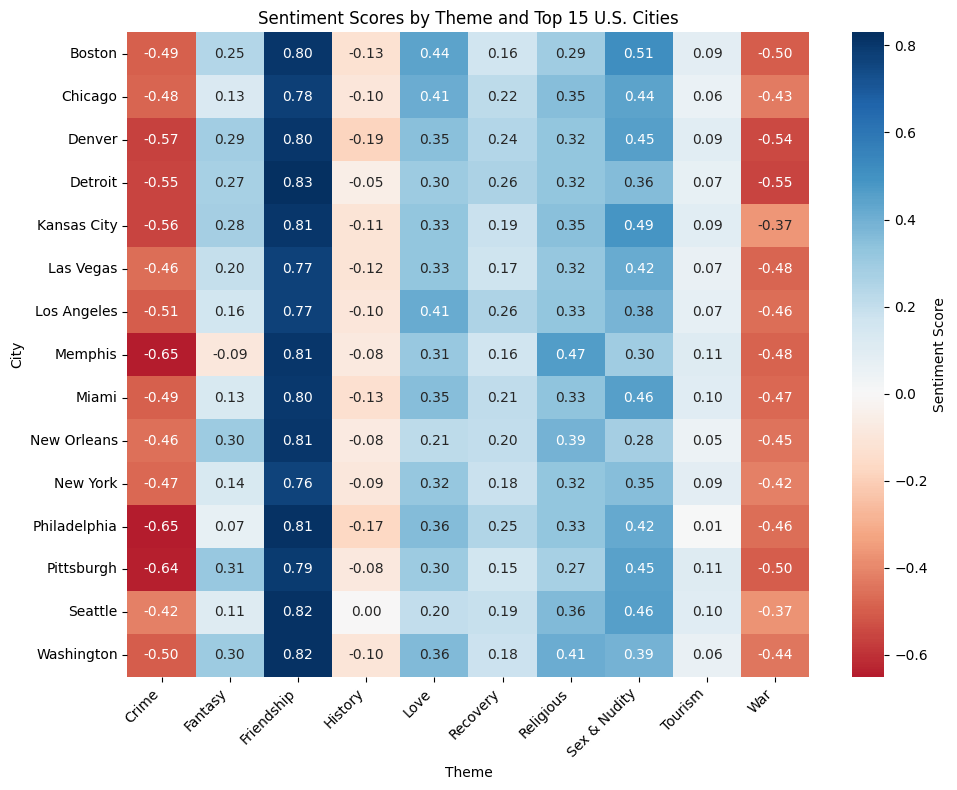

In [ ]:
# Filter data for U.S. cities
us_cities_df = results_df[results_df['Country'] == 'United States']

themes_to_exclude = ['Science', 'Politics', 'Nature', 'Family']
filtered_us_df = us_cities_df[~us_cities_df['Theme'].isin(themes_to_exclude)]
filtered_us_df = filtered_us_df[filtered_us_df['City'] != 'Guatemala']
filtered_us_df = filtered_us_df[filtered_us_df['City'] != '']
filtered_us_df = filtered_us_df[filtered_us_df['City'] != 'nan']



# Get the top 10 cities based on the number of occurrences
top_10_cities = (
    filtered_us_df['City']
    .value_counts()
    .head(15)
    .index
)
filtered_us_df = filtered_us_df[filtered_us_df['City'].isin(top_10_cities)]

# Pivot table to prepare data for heatmap
us_heatmap_data = filtered_us_df.pivot_table(
    index='City', columns='Theme', values='sentiment_score_vader', aggfunc='mean'
)

plt.figure(figsize=(10, 8))
sns.heatmap(
    us_heatmap_data, annot=True, fmt=".2f", cmap="RdBu", center=0, cbar_kws={"label": "Sentiment Score"}
)
plt.title("Sentiment Scores by Theme and Top 15 U.S. Cities")
plt.xlabel("Theme")
plt.ylabel("City")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

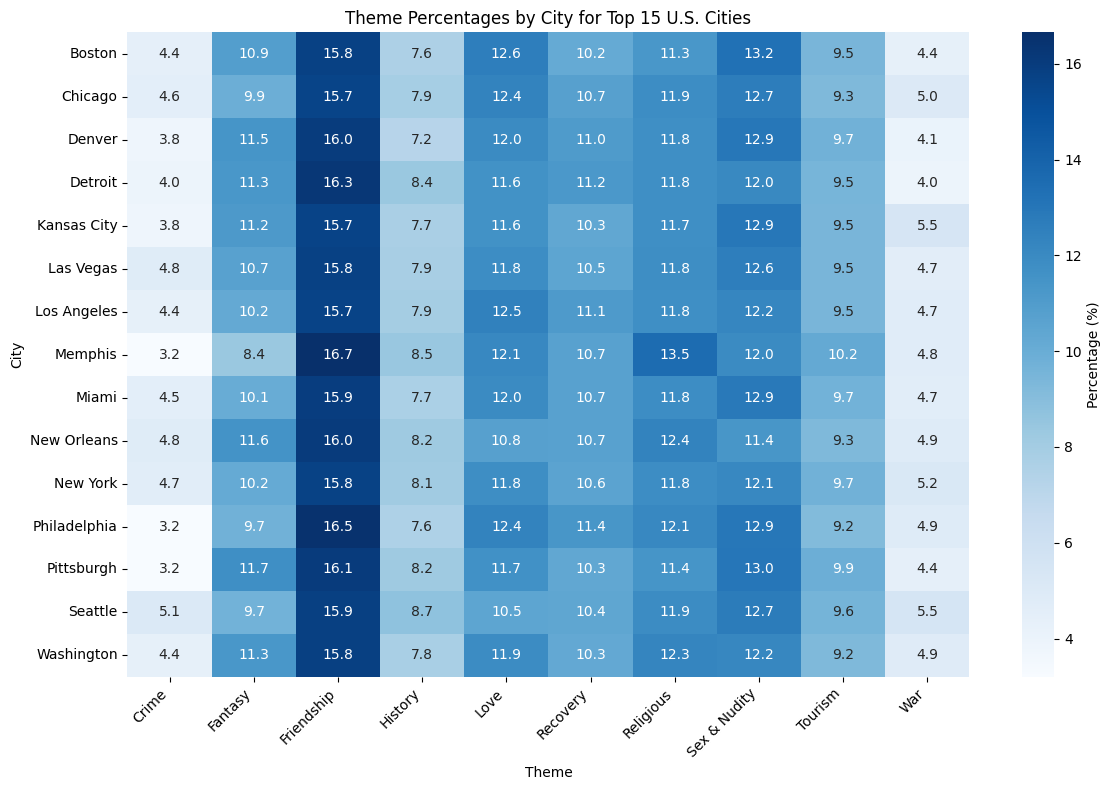

In [ ]:
# Adjust sentiment scores: Normalize to range [0, 1]
filtered_us_df['adjusted_score'] = (filtered_us_df['sentiment_score_vader'] + 1) / 2

# Pivot table with adjusted scores
us_heatmap_data = filtered_us_df.pivot_table(
    index='City', columns='Theme', values='adjusted_score', aggfunc='mean'
)

# Convert adjusted scores to percentages
us_heatmap_percentages = us_heatmap_data.div(us_heatmap_data.sum(axis=1), axis=0) * 100

plt.figure(figsize=(12, 8))
sns.heatmap(
    us_heatmap_percentages, annot=True, fmt=".1f", cmap="Blues", cbar_kws={"label": "Percentage (%)"}
)
plt.title("Theme Percentages by City for Top 15 U.S. Cities")
plt.xlabel("Theme")
plt.ylabel("City")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


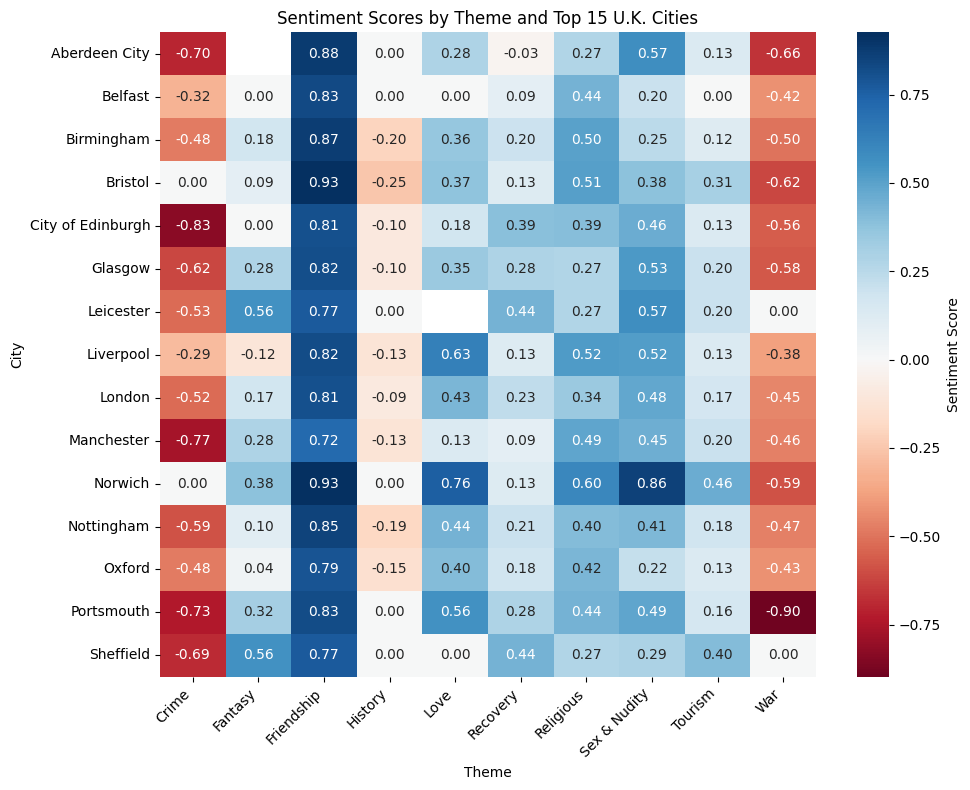

In [ ]:
# Filter data for U.K. cities
uk_cities_df = results_df[results_df['Country'] == 'United Kingdom']

themes_to_exclude = ['Science', 'Politics', 'Nature', 'Family']
filtered_uk_df = uk_cities_df[~uk_cities_df['Theme'].isin(themes_to_exclude)]
filtered_uk_df = filtered_uk_df[filtered_uk_df['City'] != 'Guatemala']
filtered_uk_df = filtered_uk_df[filtered_uk_df['City'] != '']
filtered_uk_df = filtered_uk_df[filtered_uk_df['City'] != 'nan']
filtered_uk_df = filtered_uk_df[filtered_uk_df['City'] != 'West Amesbury']
filtered_uk_df = filtered_uk_df[filtered_uk_df['City'] != 'Washington']
filtered_uk_df = filtered_uk_df[filtered_uk_df['City'] != 'New York']
filtered_uk_df = filtered_uk_df[filtered_uk_df['City'] != 'Miami']
filtered_uk_df = filtered_uk_df[filtered_uk_df['City'] != 'New Orleans']



# Get the top 10 cities based on the number of occurrences
top_10_cities = (
    filtered_uk_df['City']
    .value_counts()
    .head(15)
    .index
)
filtered_uk_df = filtered_uk_df[filtered_uk_df['City'].isin(top_10_cities)]

# Pivot table to prepare data for heatmap
uk_heatmap_data = filtered_uk_df.pivot_table(
    index='City', columns='Theme', values='sentiment_score_vader', aggfunc='mean'
)

plt.figure(figsize=(10, 8))
sns.heatmap(
    uk_heatmap_data, annot=True, fmt=".2f", cmap="RdBu", center=0, cbar_kws={"label": "Sentiment Score"}
)
plt.title("Sentiment Scores by Theme and Top 15 U.K. Cities")
plt.xlabel("Theme")
plt.ylabel("City")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

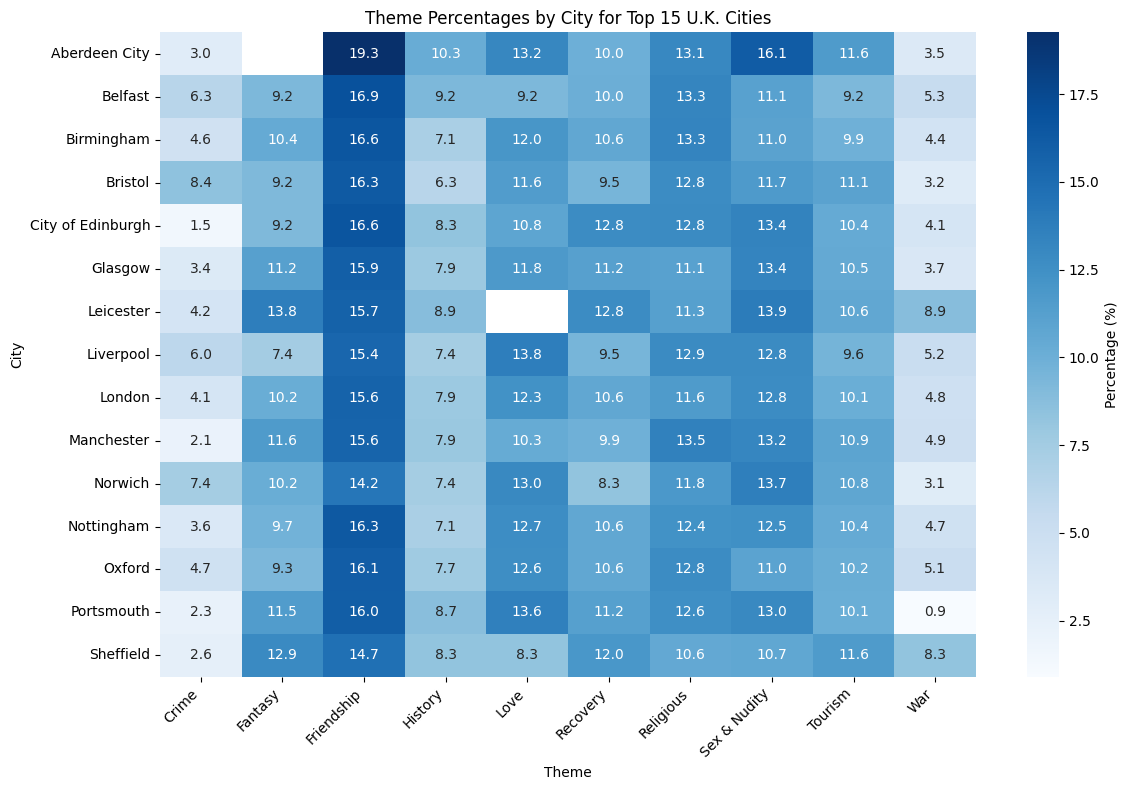

In [ ]:
# Adjust sentiment scores: Normalize to range [0, 1]
filtered_uk_df['adjusted_score'] = (filtered_uk_df['sentiment_score_vader'] + 1) / 2

# Pivot table with adjusted scores
uk_heatmap_data = filtered_uk_df.pivot_table(
    index='City', columns='Theme', values='adjusted_score', aggfunc='mean'
)

# Convert adjusted scores to percentages
uk_heatmap_percentages = uk_heatmap_data.div(uk_heatmap_data.sum(axis=1), axis=0) * 100

# Plot heatmap with adjusted percentages
plt.figure(figsize=(12, 8))
sns.heatmap(
    uk_heatmap_percentages, annot=True, fmt=".1f", cmap="Blues", cbar_kws={"label": "Percentage (%)"}
)
plt.title("Theme Percentages by City for Top 15 U.K. Cities")
plt.xlabel("Theme")
plt.ylabel("City")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
